In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("hello")

hello


In [20]:
# Your custom column names
column_names = ['index', 'restaurant_id', 'list_position', 'total_available_restaurants', 'estimate_delivery_time', 'menu_category', 'star_rating', 'purchasers']

# Load the DataFrame, skipping the first row and directly assigning your custom column names
df = pd.read_csv('data_train.csv', header=0)

# Assign your custom column names
df.columns = column_names

In [21]:
df.shape

(25668, 8)

In [22]:
# top 5 rows 
df.head()

,index,restaurant_id,list_position,total_available_restaurants,estimate_delivery_time,menu_category,star_rating,purchasers
0,19499,68,19,26,35,indian,1,42
1,5515,899,9,29,20,italian,,49
2,5461,2964,2,11,20,american,4,40
3,2868,1993,10,14,25,indian,,45
4,26403,25,49,50,45,indian,,54


In [23]:
# drop star_rating, too many missing values for it to be valuable 
df = df.drop(columns='index')
# no missing values now 
df.isnull().sum()

restaurant_id                  0
list_position                  0
total_available_restaurants    0
estimate_delivery_time         0
menu_category                  0
star_rating                    0
purchasers                     0
dtype: int64

In [24]:
df['restaurant_id'] = df['restaurant_id'].astype('category')
df.dtypes

restaurant_id                  category
list_position                     int64
total_available_restaurants       int64
estimate_delivery_time            int64
menu_category                    object
star_rating                      object
purchasers                        int64
dtype: object

In [25]:
df['star_rating'].unique()

array(['          1 ', '            ', '          4 ', '          3 ',
       '          5 ', '          2 '], dtype=object)

In [26]:
df['star_rating'] = df['star_rating'].str.strip()  # Remove leading and trailing whitespace
df['star_rating'] = df['star_rating'].replace('', np.nan)  # Replace empty strings with NaN
df['star_rating'] = df['star_rating'].astype(float)  # Convert to float
df['star_rating'] = df['star_rating'].astype('category')  # Convert to categorical

# Display the first few rows of the DataFrame to verify
print(df['star_rating'].unique())

[1.0, NaN, 4.0, 3.0, 5.0, 2.0]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]


In [27]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['menu_category'] = label_encoder.fit_transform(df['menu_category'])
df['star_rating'] = label_encoder.fit_transform(df['star_rating'])


In [28]:
# Select features and target variable
X = df[['list_position', 'total_available_restaurants', 'estimate_delivery_time', 'menu_category', 'star_rating']]
y = df['purchasers']


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 1164.6491790781295
R-squared: 0.01573107679377672
Model Coefficients:
[ 0.25343016 -0.25459638  0.29018209 -0.12961313  0.44485043]
Model Intercept:
51.93253611135134


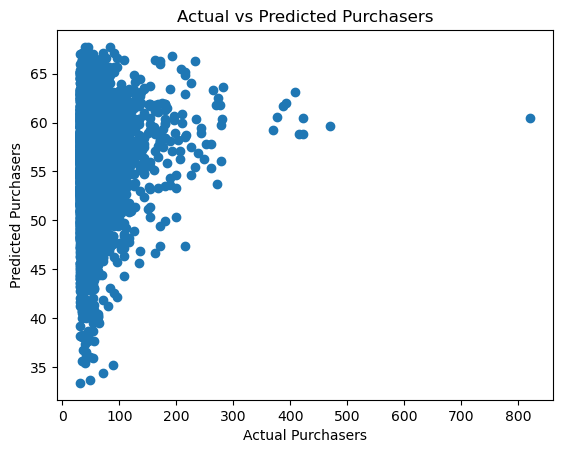

In [30]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients
print("Model Coefficients:")
print(model.coef_)

# Display the intercept
print("Model Intercept:")
print(model.intercept_)

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Purchasers')
plt.ylabel('Predicted Purchasers')
plt.title('Actual vs Predicted Purchasers')
plt.show()

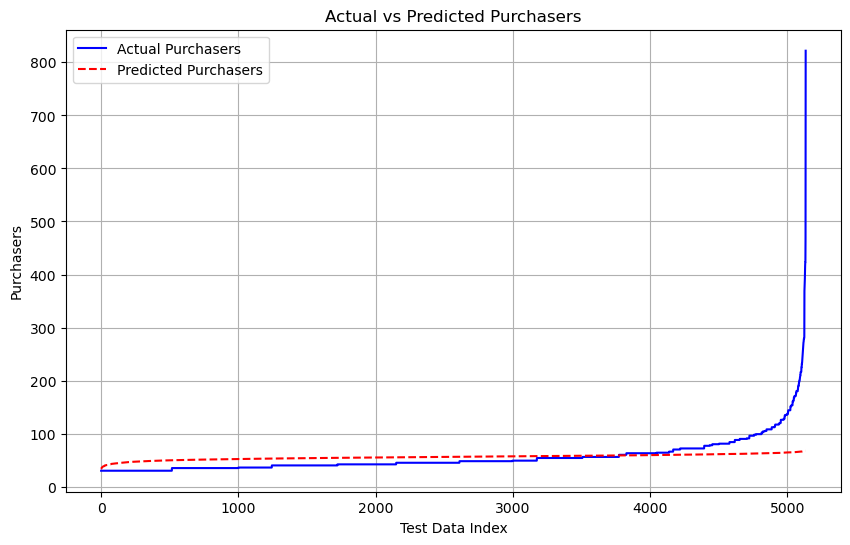

In [31]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Sort the values for a better visual comparison
y_test_sorted = np.sort(y_test)
y_pred_sorted = np.sort(y_pred)

# Create a line plot to compare actual and predicted values
plt.figure(figsize=(10, 6))

plt.plot(y_test_sorted, label='Actual Purchasers', color='blue')
plt.plot(y_pred_sorted, label='Predicted Purchasers', color='red', linestyle='--')

plt.xlabel('Test Data Index')
plt.ylabel('Purchasers')
plt.title('Actual vs Predicted Purchasers')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\vivek.jariwala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek.jariwala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek.jariwala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek.jariwala\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

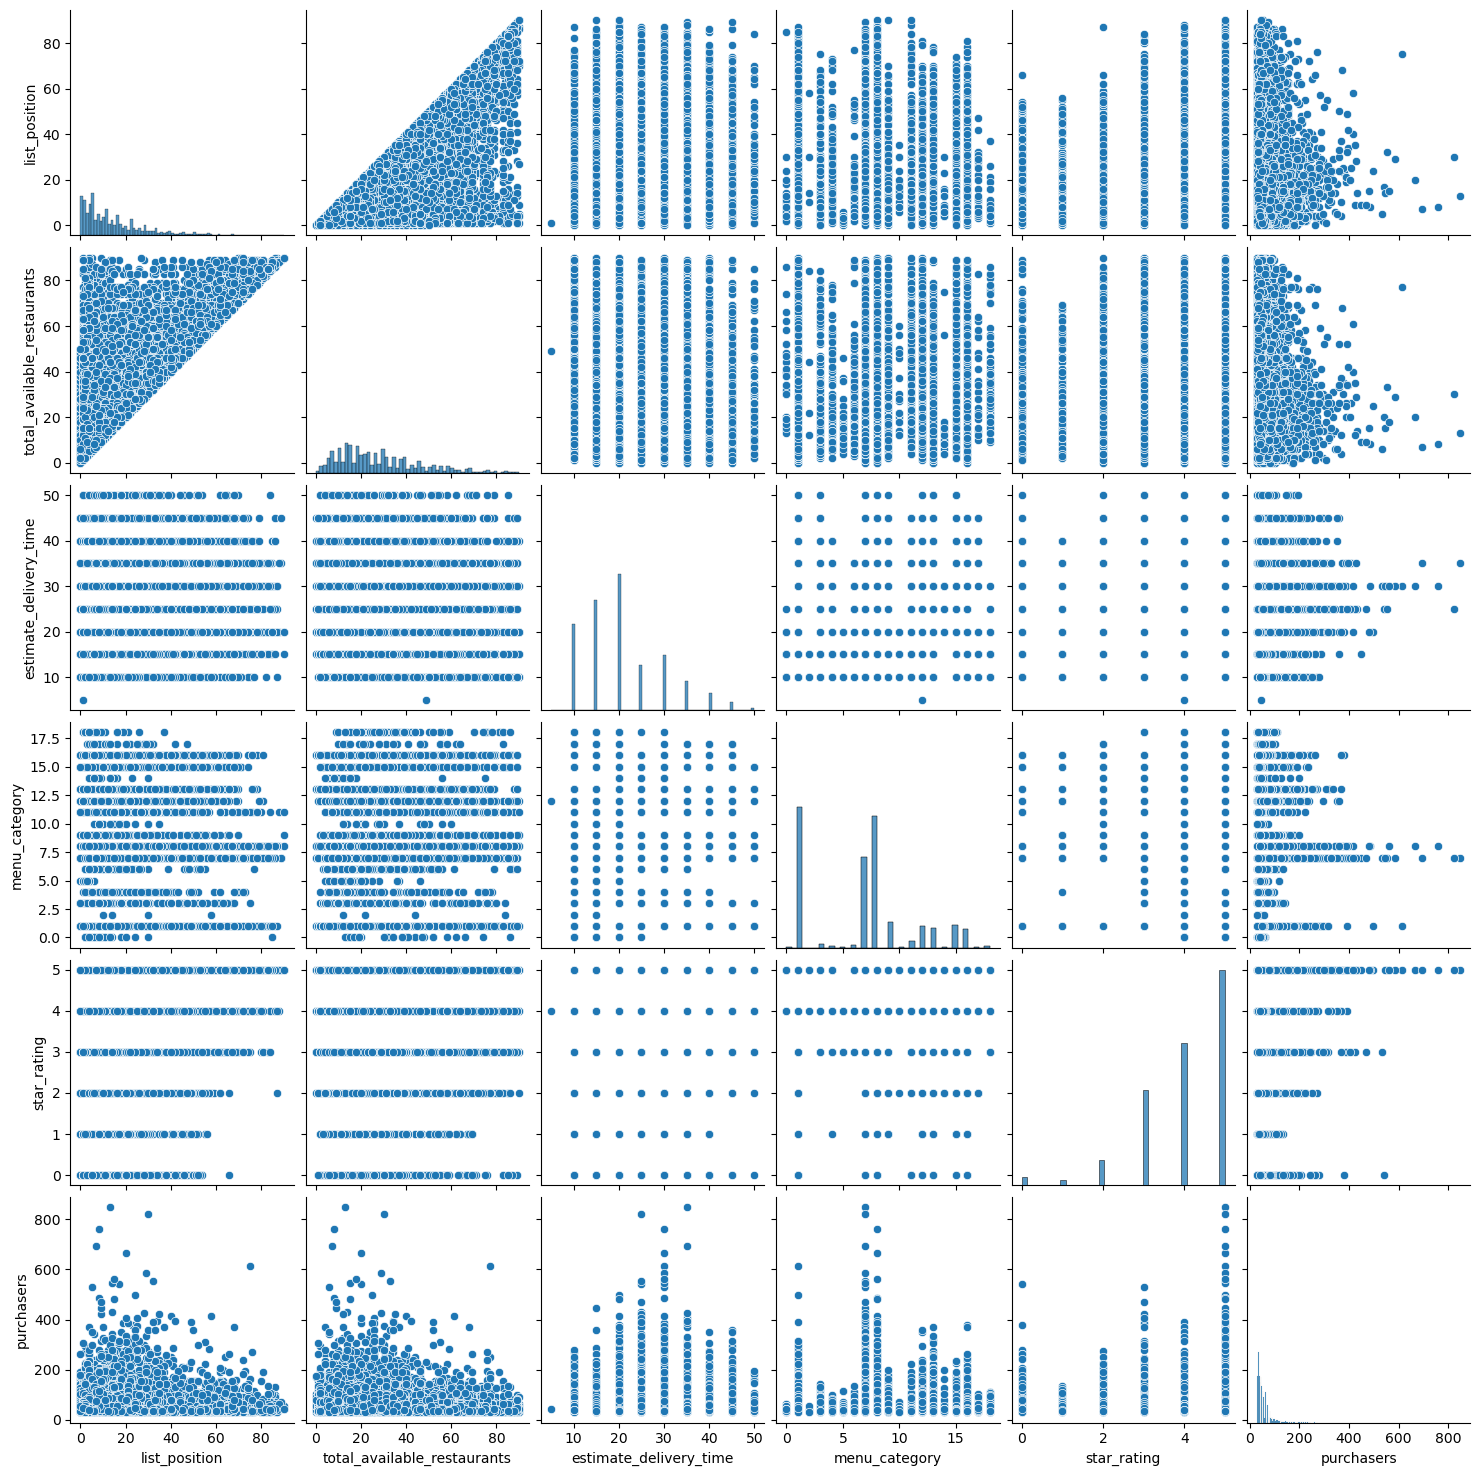

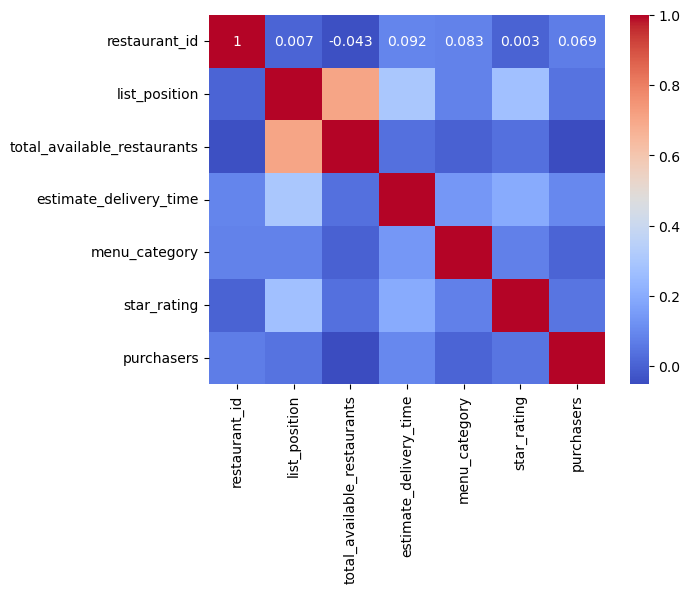

In [32]:
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Mean Squared Error: 1389.0774173252078
R-squared: -0.1739378332649344
Mean Absolute Error: 22.237700770122284


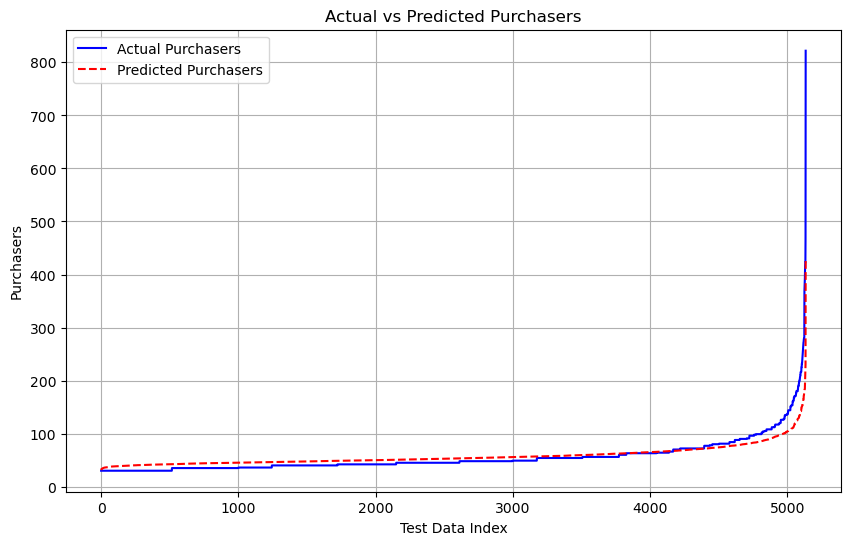

In [33]:
# Feature engineering
df['interaction'] = df['list_position'] * df['total_available_restaurants']
df['poly_delivery_time'] = df['estimate_delivery_time'] ** 2

# Select features and target variable
X = df[['list_position', 'total_available_restaurants', 'estimate_delivery_time', 'menu_category', 'star_rating', 'interaction', 'poly_delivery_time']]
y = df['purchasers']

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plotting actual vs predicted values
import matplotlib.pyplot as plt
y_test_sorted = np.sort(y_test)
y_pred_sorted = np.sort(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Purchasers', color='blue')
plt.plot(y_pred_sorted, label='Predicted Purchasers', color='red', linestyle='--')
plt.xlabel('Test Data Index')
plt.ylabel('Purchasers')
plt.title('Actual vs Predicted Purchasers')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {rmse}')


Mean Squared Error: 37.2703289135635
